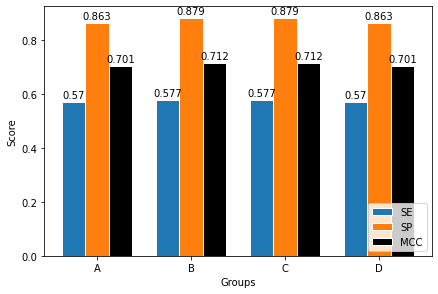

In [50]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

with open("E:/pythonProject1/Test/result_1_1.txt",'r') as f1_1:    
    result1_1 = []
    for line in f1_1.readlines():
        result1_1.append(line.strip())
with open("E:/pythonProject1/Test/result_1_2.txt",'r') as f1_2:
    result1_2 = []
    for line in f1_2.readlines():
        result1_2.append(line.strip())
with open("E:/pythonProject1/Test/result_1_3.txt",'r') as f1_3:
    result1_3 = []
    for line in f1_3.readlines():
        result1_3.append(line.strip())
with open("E:/pythonProject1/Test/result_1_4.txt",'r') as f1_4:
    result1_4 = []
    for line in f1_4.readlines():
        result1_4.append(line.strip())
result1 = []
for i in [result1_1, result1_2, result1_3, result1_4]:
    result1.append(i)
    
with open("E:/pythonProject1/Test/target.txt",'r') as ft:
    target = []
    for line in ft.readlines():
        target.append(line.strip())
        
length = len(target)

TP_1 = [0, 0, 0, 0]
FN_1 = [0, 0, 0, 0]
FP_1 = [0, 0, 0, 0]
TN_1 = [0, 0, 0, 0]
SE_1 = [0, 0, 0, 0]
SP_1 = [0, 0, 0, 0]
MCC_1 = [0, 0, 0, 0]

for index in range(4): 
    for i in range(length):
        tmp_length = len(target[i])
        for j in range(tmp_length):
            if result1[index][i][j] == '(' and target[i][j] == '(' or result1[index][i][j] == ')' and target[i][j] == ')':
                TP_1[index] += 1
            if (result1[index][i][j] == '(' or result1[index][i][j] == ')') and target[i][j] == '.':
                FP_1[index] += 1
            if (target[i][j] == '(' or target[i][j] == ')') and result1[index][i][j] == '.':
                FN_1[index] += 1
            if result1[index][i][j] == '.' and target[i][j] == '.':
                TN_1[index] += 1
    SE_1[index] = TP_1[index] / (TP_1[index] + FN_1[index])
    SP_1[index] = TP_1[index] / (TP_1[index] + FP_1[index])
    MCC_1[index] = math.sqrt(SE_1[index] * SP_1[index])

fig, ax = plt.subplots()

barWidth = 0.25
r1 = np.arange(len(SE_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, SE_1, width=barWidth, edgecolor='white',label='SE' )
plt.bar(r2, SP_1, width=barWidth, edgecolor='white',label='SP' )
plt.bar(r3, MCC_1, width=barWidth, color='k',edgecolor='white',label='MCC' )

plt.tight_layout()  # 避免上下两图之间信息重叠
tick_spacing = 1   # 应对下表过于密集

plt.xticks([r + barWidth for r in range(len(SE_1))], ['A','B','C','D'])

for x,y in enumerate(SE_1):
    plt.text(x,y+0.015,"%s"%round(y,3),ha='center')  
for x,y in enumerate(SP_1):
    plt.text(x+0.25,y+0.015,"%s"%round(y,3),ha='center')
for x,y in enumerate(MCC_1):
    plt.text(x+0.5,y+0.015,"%s"%round(y,3),ha='center')

plt.legend(loc='lower right')
plt.xlabel('Groups')
plt.ylabel('Score')
plt.show()